# **Document Embedding with LLama 3**

After the systematic evaluation of various models, a small information retrieval task will be conducted, where the most similar document to a previously selected document will be provided.

#**Preprocessing Steps**

This section outlines the steps that occur prior to the generation of embeddings. These steps are necessary to ensure the successful generation of the embeddings.

## **Install Required Packages**

In [1]:
#Install the 'transformers' library from Hugging Face
!pip install transformers

In [2]:
# Install the 'accelerate' package to speed up and optimize model training and inference in PyTorch.
!pip install accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.1/314.1 kB 6.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [3]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 17.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993227 sha256=8de392ea66ee1a41216c8cda602bb5fc5e4182d7a62b173b503e7b3f1d896257
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


## **Import Statements**

In [4]:
#Initializes a WordNetLemmatizer for reducing words to their base forms
from nltk.stem import WordNetLemmatizer
#Initializes a PorterStemmer which reduces words to their root forms
from nltk.stem import PorterStemmer
#Imports the Natural Language Toolkit (NLTK) for text processing
import nltk
#Imports a list of stopwords for text processing
from nltk.corpus import stopwords
#Imports the pandas library for data manipulation and analysis
import pandas as pd
#Library for numerical computations
import numpy as np
#Imports the regular expression module for string pattern matching.
import re
#Imports a module for vreating dictionaries with default values
from collections import defaultdict
#Imports the time function for time related operations
from time import time
#Imports the metrics module from scikit-learn library for evaluating machine learning models
from sklearn import metrics
#Imports the TfidfVectorizer class for generating TF-IDF vectors from text data
from sklearn.feature_extraction.text import TfidfVectorizer
#Imports TSNE class for dimensionality reduction
from sklearn.manifold import TSNE
#Imports the pyplot module for creating visualizations
import matplotlib.pyplot as plt
#Imports the seaborn library for statistical data visualization
import seaborn as sns
#Imports KMeans class for K-means clustering
from sklearn.cluster import KMeans
#Imports the cosine_similarity for computing cosine similarity between pairs of samples
from sklearn.metrics.pairwise import cosine_similarity
#Imports Counter class for counting hashable objects
from collections import Counter
#Imports silhouette_samples and silhouette_score for measuring the quality of clustering
from sklearn.metrics import silhouette_samples, silhouette_score
#Imports the cm module for handling colormaps
import matplotlib.cm as cm
#Imports the drive module for accessing Google Drive files in Google Colab environment.
from google.colab import drive
#Import the 'transformers' library, which provides state-of-the-art pre-trained models for natural language processing.
import transformers
#Import the PyTorch library, which is used for tensor computations and deep learning
import torch
#Import the 'login' function from the 'huggingface_hub' module to authenticate with the Hugging Face Hub.
from huggingface_hub import login
#Import the AutoModel and AutoTokenizer classes from the transformers library for loading pre-trained models and tokenizers
from transformers import AutoModel, AutoTokenizer
# Import the LabelEncoder class to convert categorical variables into numeric values
from sklearn.preprocessing import LabelEncoder
# Import the PCA (Principal Component Analysis) class from the sklearn.decomposition module for dimensionality reduction
from sklearn.decomposition import PCA
#Imports the 'BeautifulSoup' class used for parsing HTML and XML documents.
from bs4 import BeautifulSoup
#Imports the 'detect' function and 'LangDetectException' class used for detecting the language of a given text
from langdetect import detect, LangDetectException
#Import the MiniBatchKMeans class from the sklearn.cluster module for efficient k-means clustering on large datasets
from sklearn.cluster import MiniBatchKMeans
#Import the cosine_similarity function from the sklearn.metrics.pairwise module to compute the cosine similarity between samples
from sklearn.metrics.pairwise import cosine_similarity
#Import 'getpass' module to securely prompt for passwords
import getpass

## **Download Statements**

In [5]:
#Downloads the WordNet dataset for the NLTK library for using certain features like lemmatization
nltk.download('wordnet')
#Downloads the stopwords dataset for the NLTK library, which contains common words
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## **Load Model**

*We* login with a token to have access to the Llama 3 model

In [6]:
#Prompt for huggingface token
huggingFaceToken = getpass.getpass("Hugging Face Token: ")

login(huggingFaceToken)

Hugging Face Token: ··········
The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: read).
Your token has been saved to /root/.cache/huggingface/token
Login successful


Load the Llama 3 model

In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [8]:
# Load the Llama 3 model and tokenizer
model_name = "meta-llama/Meta-Llama-3-8B"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name).to(device)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/50.6k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/73.0 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


config.json:   0%|          | 0.00/654 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/1.17G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

## **Data Preprocessing**

The dataset consists of 1261 different news article. The dataset is stored in the path variable.

In [9]:
#Mounts the Google Drive at ("/content/drive") in the Google Colab enviornment
drive.mount("/content/drive")
path = '/content/drive/MyDrive/Implementation/Dataset/Output.xlsx'

Mounted at /content/drive


Preprocessing consists of several steps. First, the clean_text method from Mr.Taguchi is used, which removes HTML tags, checks whether an abstract is available, detect the language and removes specific characters. [[1]](https://github.com/Tamago55/AI-PaperMiner)

In [10]:
def clean_text(text):
    #Check if text is NaN or None and return empty string
    if pd.isnull(text):
        return ""

    #Remove HTML tags
    text = BeautifulSoup(text, "lxml").get_text()

    #Check if text is "[No abstract available]" and return empty string if true
    if text == "[No abstract available]":
        return ""

    #Detect the language of the text and return empty string if not English
    try:
        if detect(text) != 'en':
            return ""
    except LangDetectException:
        # In case language detection fails, return empty string
        return ""

    #Define patterns to remove (leading words and optional punctuation)
    patterns_to_remove = [
        r'^Objective[:\[\]\.]*\s*',
        r'^Importance[:\[\]\.]*\s*',
        r'^Background[:\[\]\.]*\s*'
    ]

    #Remove defined patterns
    for pattern in patterns_to_remove:
        text = re.sub(pattern, '', text, flags=re.IGNORECASE)

    #Remove specific unwanted characters
    stop_words = ['\x0c', '\n']
    for stop_word in stop_words:
        text = text.replace(stop_word, ' ')

    #Keep only alphabetic characters and replace others with a space
    clean_text = re.sub('[^a-zA-Z]+', ' ', text)

    #Remove stopwords
    clean_text = " ".join([word for word in clean_text.split() if word not in stop_words])

    #Convert to lowercase
    return clean_text.lower()

Then some additional preprocessing steps are added like lemmatizing and stemmeing.

In [11]:
#Initialize the lemmatizer and stemmer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

#Setting the language setting for the stop words
stop_words = set(stopwords.words('english'))


def lemmatize_text(text):
    tokens = text.split()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(lemmatized_tokens)

def stem_text(text):
    tokens = text.split()
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(stemmed_tokens)


def remove_stopwords(text):
    return " ".join([word for word in text.split() if word not in stop_words])


def remove_special_characters(text):
    return re.sub(r'[^a-zA-Z\s]', '', text)


All preprocessing steps are combined in one function. In some cases it is better to use lemmatization and stemming. In some other cases it is not suitable. In this case, it is better to not use these features

In [12]:
#Text pre-processing function
def preprocess_text(text):
    #text = remove_stopwords(text)
    #text = remove_special_characters(text)
    #text = lemmatize_text(text) #You can choose whether to apply lemmatization
    #text = stem_text(text)  #You can choose whether to apply lemmatization
    return text

The dataset, which is in an Excel file, is transferred to a Pandas data frame and pre-processed. The preprocessed abstract is stored in a new column called Clean Abstract.



In [13]:
#Read a Excel file into a pandas DataFrame object using the latin1 encoding
df = pd.read_excel(path, usecols=['Title','Abstract'])
#Applies the 'clean_text' function to the 'Abstract' column and stores the results in a new column 'clean_abstract'.
df['clean_abstract'] = df['Abstract'].apply(clean_text)

#Find the index of the 'Abstract' column and insert 'clean_abstract' right after it
abstract_col_index = df.columns.get_loc('Abstract') + 1
df.insert(abstract_col_index, 'Clean Abstract', df.pop('clean_abstract'))

#Adds a new column 'ID' with a unique identifier for each row.
df['ID'] = range(len(df))

#Filter out rows where 'clean_abstract' is empty
filtered_df = df[df['Clean Abstract'].str.strip().astype(bool)].copy()
#Applies the 'preprocess_text' function to the 'Clean Abstract' column.
filtered_df['Clean Abstract'] = filtered_df['Clean Abstract'].apply(preprocess_text)

#Save the original and preprocessed news articles
filtered_df['Preprocessed_Article'] = filtered_df['Clean Abstract']
filtered_df['Original_Article'] = df['Abstract']

#Extract the text data and associated categories from the filtered DataFrame
text_data = filtered_df['Preprocessed_Article']

Compare the news article before and after preprocessing

In [14]:
#Create a new DataFrame to compare original and preprocessed news articles
comparison_df = filtered_df[['Original_Article', 'Preprocessed_Article']]
comparison_df.head(10)

,Original_Article,Preprocessed_Article
0,Reinforcement learning from human feedback (RL...,reinforcement learning from human feedback rlh...
1,"In this work, we consider the offline preferen...",in this work we consider the offline preferenc...
2,Nowadays industrial robots have become the key...,nowadays industrial robots have become the key...
3,Preference learning is a key technology for al...,preference learning is a key technology for al...
4,Aligning large language models (LLMs) with hum...,aligning large language models llms with human...
5,"In the realm of human mobility, the decision-m...",in the realm of human mobility the decision ma...
6,As the latest advancements in natural language...,as the latest advancements in natural language...
7,Reinforcement learning from human feedback (RL...,reinforcement learning from human feedback rlh...
8,"In this work, we propose REBEL, an algorithm f...",in this work we propose rebel an algorithm for...
9,Preference-based Reinforcement Learning (PbRL)...,preference based reinforcement learning pbrl i...


# **Llama 3**

With this function we get the Llama 3 embedding of a document. The average of the last layer hidden states over all tokens in the input sequence is calculated to obtain a single vector representation of the entire sequence.




In [15]:
def get_mean_embeddings(texts):
    #Tokenize the input texts
    inputs = tokenizer(texts, return_tensors="pt", padding=False, truncation=True)

    inputs = {key: tensor.to(device) for key, tensor in inputs.items()}
    #Get the model's outputs
    with torch.no_grad():
        outputs = model(**inputs)
    #Return the mean-pooled embeddings as a NumPy array
    return outputs.last_hidden_state.mean(dim=1).squeeze().cpu().numpy()

This code calculates the Llama 3 embeddings for each text in the 'News' column of the news_df DataFrame and stores the resulting embeddings in a NumPy array called np_embeddings.



In [16]:
#Create an empty list to store the embeddings
embeddings = []

#Iterate over each text in the 'News' column of the DataFrame and compute its Llama embedding
for text in filtered_df['Preprocessed_Article']:
    #Call the function 'get_mean_embedding' to get the Llama embedding for the current text
    embedding = get_mean_embeddings(text)

    #Append the embedding to the list of embeddings
    embeddings.append(embedding)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [17]:
embeddings = np.array(embeddings)

Print the shape of the embeddings. The first number in the tuple represents the number of documents and the second number the hidden dimensions

In [18]:
print(embeddings.shape)

(1262, 4096)


Llama 3 embeddings ​​of the first document.

In [19]:
#Display the Embeddings of the first document
print(text_data[0])
print(embeddings[0])

reinforcement learning from human feedback rlhf emerges as a promising paradigm for aligning large language models llms however a notable challenge in rlhf is overoptimization where beyond a certain threshold the pursuit of higher rewards leads to a decline in human preferences in this paper we observe the weakness of kl regularization which is commonly employed in existing rlhf methods to address overoptimization to mitigate this limitation we scrutinize the rlhf objective in the offline dataset and propose uncertainty penalized rlhf up rlhf which incorporates uncertainty regularization during rl finetuning to enhance the uncertainty quantification abilities for reward models we first propose a diverse low rank adaptation lora ensemble by maximizing the nuclear norm of lora matrix concatenations then we optimize policy models utilizing penalized rewards determined by both rewards and uncertainties provided by the diverse reward lora ensembles our experimental results based on two real

# **Clustering**

For the KMeans Clustering you need the number of clusters. For that we use the elbow method to find the optimal number of clusters.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 2 clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 4 clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 6 clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 8 clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 10 clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 12 clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 14 clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 16 clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 18 clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 20 clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 22 clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 24 clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 26 clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 28 clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 30 clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 32 clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 34 clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 36 clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 38 clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 40 clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 42 clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 44 clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 46 clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 48 clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 50 clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 52 clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 54 clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 56 clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 58 clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 60 clusters


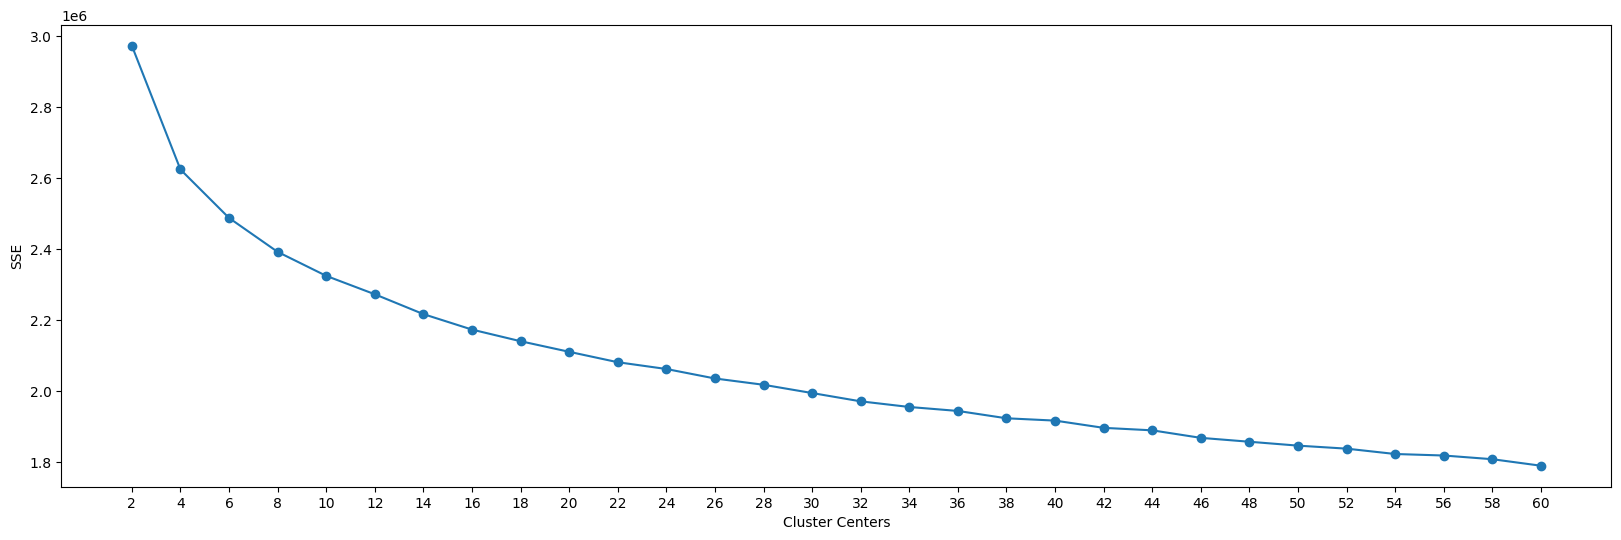

In [20]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k + 1, 2)

    sse = []
    for k in iters:
        kmeans = KMeans(n_clusters=k, random_state=20)
        kmeans.fit(data)
        sse.append(kmeans.inertia_)
        print('Fit {} clusters'.format(k))

    f, ax = plt.subplots(1, 1, figsize=(20, 6))
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    plt.show()

cluster_num = 60
find_optimal_clusters(embeddings, cluster_num)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 2 clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 4 clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 6 clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 8 clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 10 clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 12 clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 14 clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 16 clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 18 clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 20 clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 22 clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 24 clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 26 clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 28 clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 30 clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 32 clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 34 clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 36 clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 38 clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 40 clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 42 clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 44 clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 46 clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 48 clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 50 clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 52 clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 54 clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 56 clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 58 clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 60 clusters


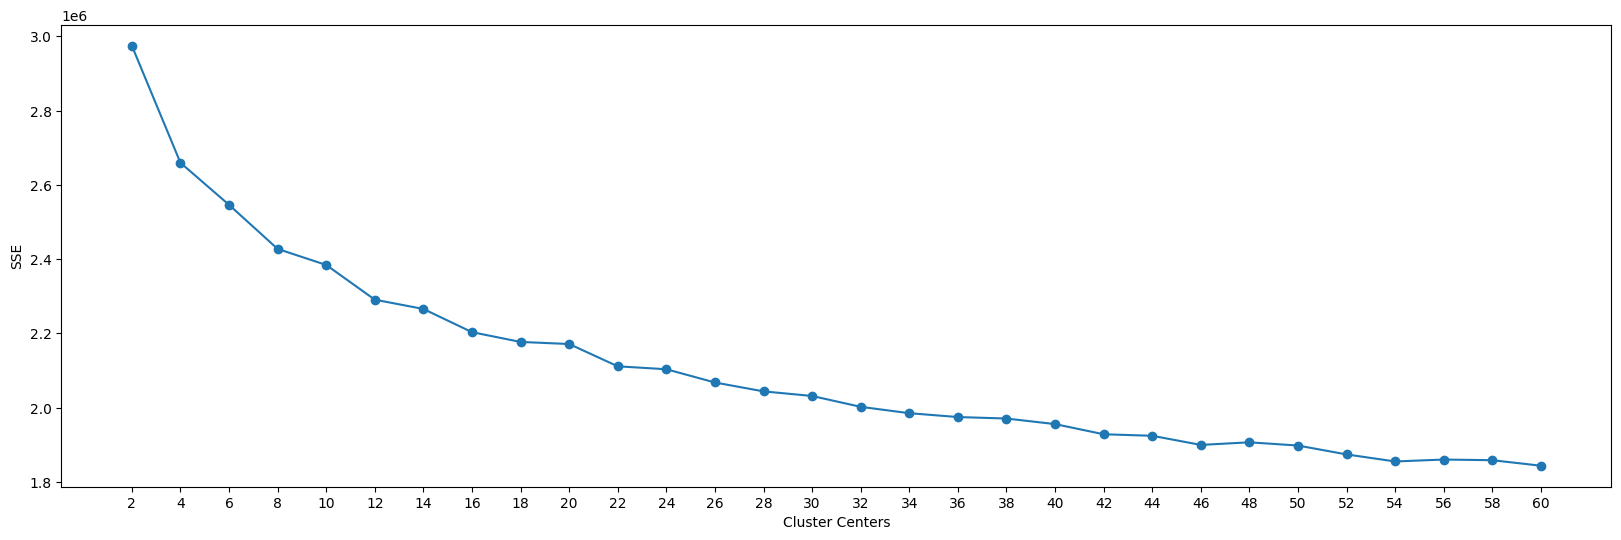

In [21]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)

    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(embeddings).inertia_)
        print('Fit {} clusters'.format(k))

    f, ax = plt.subplots(1, 1, figsize=(20, 6))
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')

cluster_num = 60
find_optimal_clusters(embeddings, cluster_num)

Trains the KMeans clustering algorithm and visualizes the clusters in a scatter plot. It also prints the number of elements assigned to each cluster.

In [22]:
true_k = 10;
#Initialize and train KMeans clustering algorithm
kmeans = KMeans(
    n_clusters=true_k,  #Number of clusters
    max_iter=100,       #Maximum number of iterations
    n_init=50,          #Number of times it will run with different initial centroids
    random_state=1,  #Random seed for reproducibility
).fit(embeddings)



Dimensionality reduction is used to visualize data in a low-dimensional space. In this case, the feature dimensions are reduced to two to make complex relationships between the data points easier to visualize. For this step, t-SNE (t-Distributed Stochastic Neighbor Embedding) is used

In [23]:
#Reduce dimensionality of embeddings using t-SNE
tsne = TSNE(n_components=2, random_state=42,init='random')
embeddings_2d = tsne.fit_transform(embeddings)

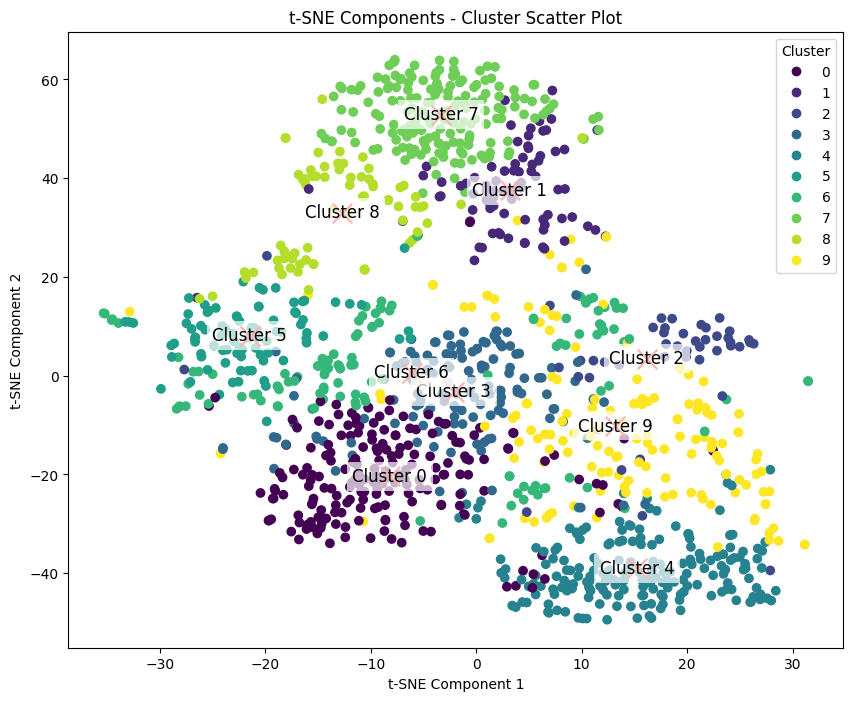

Number of elements assigned to each cluster: [198  80  45 140 194  89 122 176  71 147]


In [24]:
#Calculate the number of elements assigned to each cluster
cluster_ids_tfidf, cluster_sizes_tfidf = np.unique(kmeans.labels_, return_counts=True)

#Step 3: Visualize the clusters using the t-SNE reduced data
plt.figure(figsize=(10, 8))
cluster_labels = kmeans.labels_

scatter = plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=cluster_labels, cmap='viridis')

#Add labels und center points to the clusters
for label in range(true_k):
    plt.text(embeddings_2d[cluster_labels == label, 0].mean(), embeddings_2d[cluster_labels == label, 1].mean(),
             f'Cluster {label}', fontsize=12, ha='center', va='center',
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
    plt.scatter(embeddings_2d[cluster_labels == label, 0].mean(), embeddings_2d[cluster_labels == label, 1].mean(), marker='x', color='red', s=200, label='Cluster Centers')


#Add axis labels and title
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Components - Cluster Scatter Plot')

#Add legend
legend = plt.legend(*scatter.legend_elements(), title='Cluster')

#Show the scatter plot
plt.show()

print(f"Number of elements assigned to each cluster: {cluster_sizes_tfidf}")


# **Information Retrieval**

Now we visualize the  number of documents in each cluster

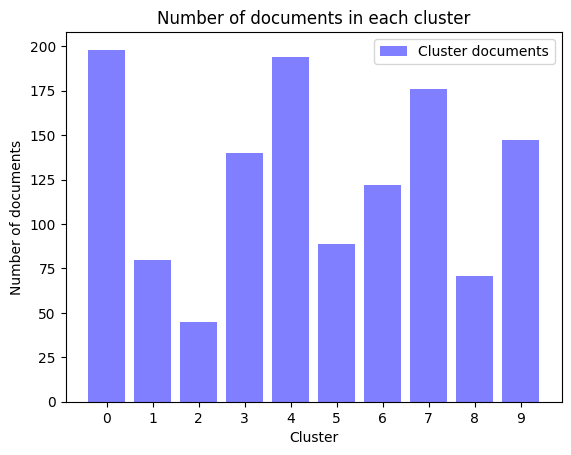

Number of documents in each cluster:
Cluster 0: 198
Cluster 1: 80
Cluster 2: 45
Cluster 3: 140
Cluster 4: 194
Cluster 5: 89
Cluster 6: 122
Cluster 7: 176
Cluster 8: 71
Cluster 9: 147


In [25]:
#Plot the number of documents in each clusterplt.figure(figsize=(10, 5))
plt.bar(range(len(cluster_sizes_tfidf)), cluster_sizes_tfidf, color='blue', alpha=0.5, label='Cluster documents')
plt.xlabel('Cluster')
plt.ylabel('Number of documents')
plt.title('Number of documents in each cluster')
plt.xticks(range(len(cluster_sizes_tfidf)))
plt.legend()
plt.show()

#Output of numbers
print("Number of documents in each cluster:")
for cluster_id, cluster_size in zip(cluster_ids_tfidf, cluster_sizes_tfidf):
    print(f"Cluster {cluster_id}: {cluster_size}")

Get the 5 most similar documents to a given document based on the cosine similarity

In [26]:
#Display the Embeddings of the first document
print(text_data[25])

individuals with cocaine use disorder or gambling disorder demonstrate impairments in cognitive flexibility the ability to adapt to changes in the environment flexibility is commonly assessed in a laboratory setting using probabilistic reversal learning which involves reinforcement learning the process by which feedback from the environment is used to adjust behavior aimsit is poorly understood whether impairments in flexibility differ between individuals with cocaine use and gambling disorders and how this is instantiated by the brain we applied computational modelling methods to gain a deeper mechanistic explanation of the latent processes underlying cognitive flexibility across two disorders of compulsivity methodwe present a re analysis of probabilistic reversal data from individuals with either gambling disorder n or cocaine use disorder n and control participants n using a hierarchical bayesian approach furthermore we relate behavioural findings to their underlying neural substra

In [27]:
#'query_embedding' is the Llama embedding of the document you want to find similar documents to
query_embedding = embeddings[25]  # index 25 is the query document

#Compute cosine similarity between the query embedding and all other embeddings
similarities = cosine_similarity([query_embedding], embeddings)

#Flatten similarities array
similarities = similarities.flatten()

#Sort indices based on similarity scores (descending order)
related_docs_indices = similarities.argsort()[::-1]

#Display the top 5 most similar documents
top_n = 6  # Including the query document itself
for idx in related_docs_indices[0:top_n]:  #Include the first item (itself)
    print(f"Document {idx}:")
    print(filtered_df['Preprocessed_Article'].iloc[idx])
    print("Cosine Similarity:", similarities[idx])
    print()

Document 25:
individuals with cocaine use disorder or gambling disorder demonstrate impairments in cognitive flexibility the ability to adapt to changes in the environment flexibility is commonly assessed in a laboratory setting using probabilistic reversal learning which involves reinforcement learning the process by which feedback from the environment is used to adjust behavior aimsit is poorly understood whether impairments in flexibility differ between individuals with cocaine use and gambling disorders and how this is instantiated by the brain we applied computational modelling methods to gain a deeper mechanistic explanation of the latent processes underlying cognitive flexibility across two disorders of compulsivity methodwe present a re analysis of probabilistic reversal data from individuals with either gambling disorder n or cocaine use disorder n and control participants n using a hierarchical bayesian approach furthermore we relate behavioural findings to their underlying n

In [28]:
print(text_data[179])

fine tuning via methods such as instruction tuning or reinforcement learning from human feedback is a crucial step in training language models to robustly carry out tasks of interest however we lack a systematic understanding of the effects of fine tuning particularly on tasks outside the narrow fine tuning distribution in a simplified scenario we demonstrate that improving performance on tasks within the fine tuning data distribution comes at the expense of suppressing model capabilities on other tasks this degradation is especially pronounced for tasks closest to the fine tuning distribution we hypothesize that language models implicitly infer the task of the prompt corresponds and the fine tuning process predominantly skews this task inference towards tasks in the fine tuning distribution to test this hypothesis we propose conjugate prompting to see if we can recover pretrained capabilities conjugate prompting artificially makes the task look farther from the fine tuning distributio

In [29]:
#'query_embedding' is the Llama embedding of the document you want to find similar documents to
query_embedding = embeddings[179]  # index 179 is the query document

#Compute cosine similarity between the query embedding and all other embeddings
similarities = cosine_similarity([query_embedding], embeddings)

#Flatten similarities array
similarities = similarities.flatten()

#Sort indices based on similarity scores (descending order)
related_docs_indices = similarities.argsort()[::-1]

#Display the top 5 most similar documents
top_n = 6  # Including the query document itself
for idx in related_docs_indices[0:top_n]:  #Include the first item (itself)
    print(f"Document {idx}:")
    print(filtered_df['Preprocessed_Article'].iloc[idx])
    print("Cosine Similarity:", similarities[idx])
    print()

Document 179:
fine tuning via methods such as instruction tuning or reinforcement learning from human feedback is a crucial step in training language models to robustly carry out tasks of interest however we lack a systematic understanding of the effects of fine tuning particularly on tasks outside the narrow fine tuning distribution in a simplified scenario we demonstrate that improving performance on tasks within the fine tuning data distribution comes at the expense of suppressing model capabilities on other tasks this degradation is especially pronounced for tasks closest to the fine tuning distribution we hypothesize that language models implicitly infer the task of the prompt corresponds and the fine tuning process predominantly skews this task inference towards tasks in the fine tuning distribution to test this hypothesis we propose conjugate prompting to see if we can recover pretrained capabilities conjugate prompting artificially makes the task look farther from the fine tuni

# **Sources**

The datasets,code, different methods and explanations are from these sources:

*   https://github.com/Tamago55/AI-PaperMiner
* https://www.learndatasci.com/glossary/cosine-similarity/
* https://huggingface.co/meta-llama/Meta-Llama-3-8B
* https://llama.meta.com/llama3/
* https://ai.meta.com/blog/meta-llama-3/
* https://github.com/meta-llama/llama3
* ChatGPT to generate code and text
